### 2. 노령화 지수 

#### -사용 데이터: 2022년 시군구/성/연령(5세)별 주민등록연앙인구 (kosis)
#### (연앙인구: 출생률과 사망률을 산출할 때 한 해의 중간인 7월1일을 기준으로 하여 산출한 인구)
#### -출처: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040M5&conn_path=I3
#### -노령화지수 = 고령인구(65세 이상) ÷ 유소년인구(~14세)×100
#### -노령화 지수 계산을 위해 0~14세 인구를 유소년 인구로, 65세 이상 인구를 고령인구로 병합
#### -데이터 기준은 각 시도의 시군구를 기준으로 하였으며 광역시 이하의 시군구는 제거하였음

In [40]:
import pandas as pd
import numpy as np

df2 = pd.read_excel("C:/Users/user/Desktop/평창군데이터/평창군데이터_전처리/주민등록인구수.xlsx")

young_df = df2.iloc[:,2:5].sum(axis=1)
old_df = df2.iloc[:,-10:].sum(axis=1)

#노령화지수 = 고령인구(65세 이상) ÷ 유소년인구(~14세)×100

df2['노령화지수'] = old_df / young_df * 100
df2['유소년인구'] = young_df
df2['노년인구'] = old_df

df2.drop(df2.columns[2:-3], axis=1, inplace=True)
df2 = df2.sort_values(by='노령화지수',ascending=False)
df2 = df2.reset_index(drop=True)

df2['노령화지수(로그변환)'] = np.log1p(df2['노령화지수'])
df2.head()

,시도,시군구,노령화지수,유소년인구,노년인구,노령화지수(로그변환)
0,경상북도,군위군,1386.372361,1042.0,14446.0,7.235167
1,경상북도,의성군,1172.763205,2783.0,32638.0,7.067970
2,경상남도,합천군,1079.009861,2484.5,26808.0,6.984725
3,경상북도,청도군,1027.290036,2363.5,24280.0,6.935653
4,전라남도,고흥군,1015.754373,3973.5,40361.0,6.924371


#### '광역시', '특별시'가 아닌 시도의 시군구가 'ㅇㅇ구'인 인덱스 찾아 제거

In [41]:
no_df = df2[~df2['시도'].str.contains('광역시')]  #물결 표시는 부정의 역할
no_df = no_df[~no_df['시도'].str.contains('특별')]
indexes = no_df[no_df['시군구'].str.endswith('구')]
indexes

,시도,시군구,노령화지수,유소년인구,노년인구,노령화지수(로그변환)
201,경기도,단원구,144.058102,32081.5,46216.0,4.977134


#### 경기도 단원구라는 잘못된 데이터 존재 -> 제거

In [42]:
df2 = df2[df2['시군구'] != '단원구']

#### (1) 기초통계량

In [43]:
round(df2.describe())

,노령화지수,유소년인구,노년인구,노령화지수(로그변환)
count,229.0,229.0,229.0,229.0
mean,379.0,26211.0,52855.0,6.0
std,258.0,29312.0,39408.0,1.0
min,71.0,574.0,3252.0,4.0
25%,180.0,4485.0,23886.0,5.0
50%,283.0,15204.0,42088.0,6.0
75%,536.0,36130.0,73087.0,6.0
max,1386.0,156626.0,217703.0,7.0


In [45]:
#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


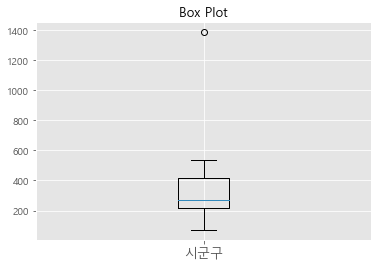

In [51]:
fig.set_facecolor('white') ## 캔버스 배경색 설정
 
plt.boxplot(df2['노령화지수'].describe()) ## 상자 수염 그림 출력
 
fontsize=13 ## 폰트 사이즈
plt.xticks([1],['시군구'], fontsize=fontsize) ## x축 눈금 라벨
plt.title('Box Plot',fontsize=fontsize) ## 타이틀
plt.show()

#### (2) 평창군의 위치

In [44]:
df2[df2['시군구'] == '평창군']

,시도,시군구,노령화지수,유소년인구,노년인구,노령화지수(로그변환)
50,강원도,평창군,589.521368,2925.0,17243.5,6.381006


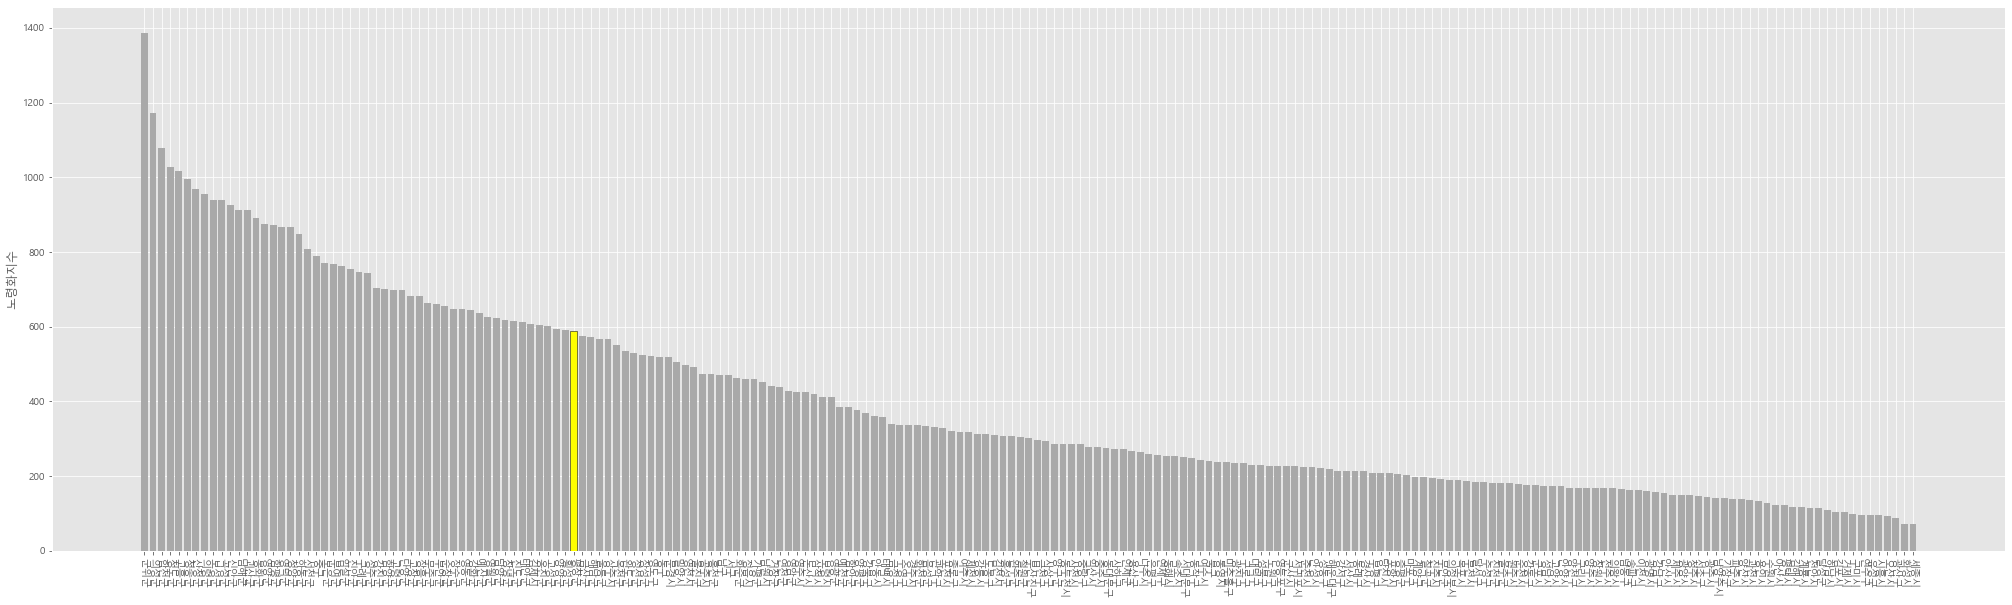

In [50]:
y = df2.iloc[:, 2].values.copy()
x = df2.iloc[:, 1].values.copy()

fig, ax = plt.subplots(figsize=(35,10))
ax.bar(x,y,fc='darkgray')
plt.xticks(rotation=-90)
plt.ylabel('노령화지수')

bars = ax.patches
bars[50].set_facecolor("yellow")
bars[50].set_edgecolor("k")